In [1]:
import tensorflow as tf
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
__author__ = "Olivares Castillo José Luis"

tf.__version__

'1.5.0-rc0'

In [2]:
es,na = utils.load_node2vec()

In [3]:
na_dummy = na.drop(na.columns[0],axis=1)
na_vectores1 = np.array(na_dummy)

In [4]:
eval_set = pd.read_csv("../lexiconevaluacion/evaluationset",delimiter=" ",names=["esp","nah"])

In [5]:
eval_set.head()

,esp,nah
0,traer,itqui
1,traer,huica
2,traer,huiqui
3,traer,cui
4,adornar,apana


In [6]:
eval_es = list(set(eval_set["esp"]))

In [7]:
eval_es_index = [int(es[es[0] == palabra].index[0])
                  for palabra in eval_es]

In [8]:
es[es[0] == "pluma"]

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
2902,pluma,-0.386967000000000005,0.005026,-0.191887000000000002,-0.081058000000000005,-0.211675000000000002,-0.217542999999999986,-0.019026000000000001,0.454046000000000005,0.006309,...,-0.013390000000000001,0.023695999999999998,0.394602000000000008,-0.003221,-0.708667000000000047,0.021819000000000002,0.181774999999999992,0.436242000000000019,-0.162193000000000004,-0.076617000000000005


In [9]:
eval_es_index[0]

3756

In [10]:
eval_es_vectores = utils.get_vectors(es,eval_es_index)

In [11]:
eval_es_vectores.shape

(150, 128)

In [12]:
test_vectors = np.array([np.array(es.iloc[indice][1::]).astype(np.float64) for indice in eval_es_index])

In [13]:
sess = tf.Session()

In [14]:
saver = tf.train.import_meta_graph('./models/model1111_gpu/model2250.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('./models/model1111_gpu/'))

INFO:tensorflow:Restoring parameters from ./models/model1111_gpu/model2250.ckpt


In [15]:
graph = tf.get_default_graph()

In [16]:
X = graph.get_tensor_by_name("input/input_es:0")
#y = graph.get_tensor_by_name("input/target_na:0")

In [17]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['input/input_es',
 'input/target_na',
 'Const',
 'W1/Initializer/random_uniform/shape',
 'W1/Initializer/random_uniform/min',
 'W1/Initializer/random_uniform/max',
 'W1/Initializer/random_uniform/RandomUniform',
 'W1/Initializer/random_uniform/sub',
 'W1/Initializer/random_uniform/mul',
 'W1/Initializer/random_uniform',
 'W1',
 'W1/IsInitialized/VarIsInitializedOp',
 'W1/Assign',
 'W1/Read/ReadVariableOp',
 'Read/ReadVariableOp',
 'Identity',
 'W1/Regularizer/l2_regularizer/scale',
 'W1/Regularizer/l2_regularizer/L2Loss/ReadVariableOp',
 'W1/Regularizer/l2_regularizer/L2Loss',
 'W1/Regularizer/l2_regularizer',
 'Const_1',
 'b1',
 'b1/Assign',
 'b1/read',
 'xw_plus_b/ReadVariableOp',
 'xw_plus_b/MatMul',
 'xw_plus_b',
 'fc1',
 'transpose/Rank/ReadVariableOp',
 'transpose/Rank',
 'transpose/sub/y',
 'transpose/sub',
 'transpose/Range/start',
 'transpose/Range/delta',
 'transpose/Range',
 'transpose/sub_1',
 'transpose/ReadVariableOp',
 'transpose',
 'Const_2',
 'b2',
 'b2/Assign',
 'b2/

In [18]:
#output_NN = graph.get_tensor_by_name("output/xw_plus_b:0")#model1937
output_NN = graph.get_tensor_by_name("xw_plus_b_1:0")
#output_NN = graph.get_tensor_by_name("dense_2/BiasAdd:0")
#output_NN = graph.get_tensor_by_name("output_1:0")

In [19]:
for v in tf.trainable_variables():
        print(v.name)

W1:0
b1:0
b2:0


In [20]:
from tensorflow.python import pywrap_tensorflow
    
model_file = "./models/model1111_gpu/model2250.ckpt"
reader = pywrap_tensorflow.NewCheckpointReader(model_file)
var_to_shape_map = reader.get_variable_to_shape_map()
    
for key in sorted(var_to_shape_map):
    print("tensor_name: ", key)
    #print(reader.get_tensor(key))
print(type(reader.get_tensor("b1")))

tensor_name:  W1
tensor_name:  W1/Adagrad
tensor_name:  b1
tensor_name:  b1/Adagrad
tensor_name:  b2
tensor_name:  b2/Adagrad
<class 'numpy.ndarray'>


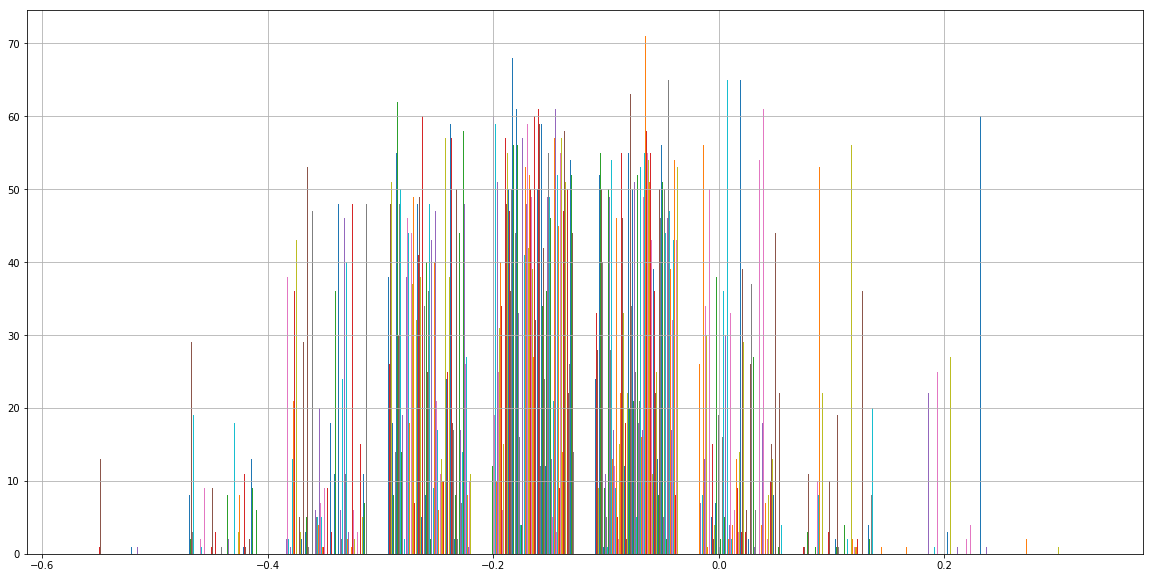

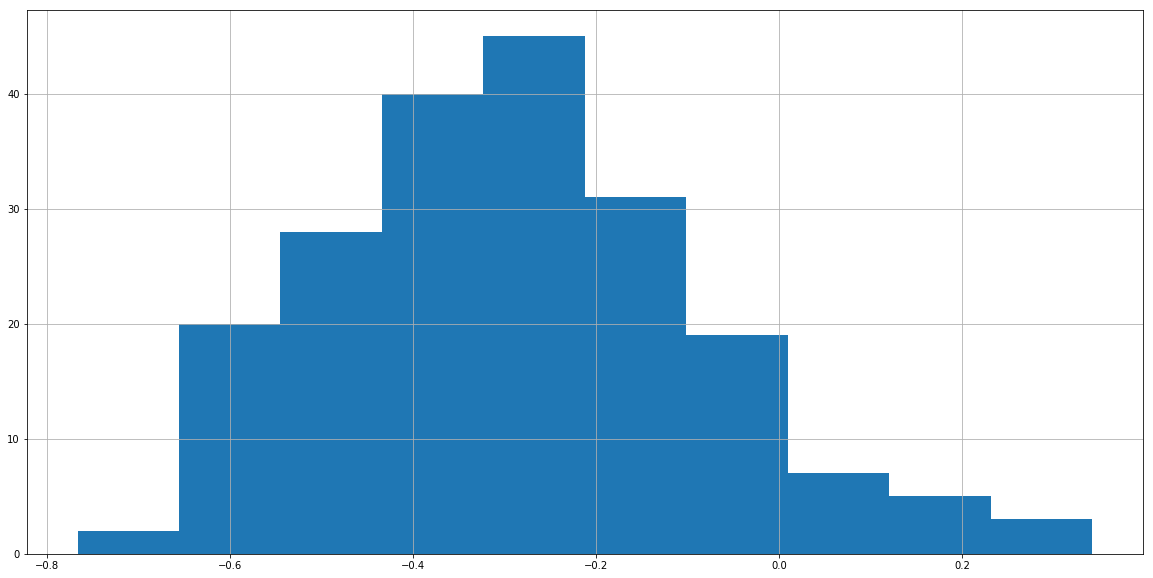

In [21]:
def plot_tensors(tensor):
    plt.figure(figsize=(20,10))
    plt.hist(reader.get_tensor(tensor)+reader.get_tensor("b1"))
    plt.grid(True)
    plt.show()
plot_tensors("W1")
plot_tensors("b1")

In [22]:
feed_dict = {X:test_vectors}
pred = sess.run(output_NN,feed_dict)
print (type(pred[0]),pred.shape)

In [24]:
top_10 = [utils.get_top10_closest(pred[_],na_vectores1) for _ in range(pred.shape[0])]
closest = [utils.get_closest_words_to(top_10[_],na) for _ in range(pred.shape[0])]

In [26]:
es[es[0]=="adquisición"].index

Int64Index([2222], dtype='int64')

In [27]:
na[na[0]=="v"].index

Int64Index([1376], dtype='int64')

In [28]:
eval_es[6]

'ramo'

In [29]:
closest[6]

['ramos', 'g', 'señor', 'pixca', 'poalli', 'vor', 'ri', 'gr', 'egorio', 'jesu']

In [30]:
resultados = {palabra_es:top_10_nah for (palabra_es,top_10_nah) in zip(eval_es,closest)}

In [31]:
esp = list(eval_set["esp"].values)
nah = list(eval_set["nah"].values)
pares_eval = list(zip(esp,nah))

In [35]:
from collections import defaultdict
gold = defaultdict(list)
for palabra_es,palabra_na in pares_eval:
    gold[palabra_es].append(palabra_na)
gold = dict(gold)

In [37]:
gold["amado"]

['tlazo', 'tlazohtla']

In [38]:
resultados["amado"]

['tlazohtla',
 'ticcua',
 'ama',
 'zquia',
 'tlazo',
 'diego',
 'comal',
 'nami',
 'secretario',
 'federal']

In [39]:
p1 = 0
p5 = 0
p10 = 0
list_esp_eval = (list(resultados.keys()))
hits=list()

not_found = list()

for palabra_gold in list_esp_eval:
    for i in gold[palabra_gold]:
        if i in resultados[palabra_gold]:
            hits.append(resultados[palabra_gold].index(i))
    if hits.__len__() > 0:
        if min(hits) == 0:
            p1 += 1
            p5 += 1
            p10 += 1
        if min(hits) >= 1 and min(hits) <= 5:
            p5 += 1
            p10 += 1
        if min(hits) > 5 and min(hits) <= 10:
            p10 += 1
        print(palabra_gold,min(hits),hits,p1,p5,p10)
    else:
        not_found.append(palabra_gold)
        print(palabra_gold+": NOT FOUND")
   
    hits.clear()

length=list_esp_eval.__len__()
print("\nnot found:", not_found.__len__(), "\nP@1:", p1 / length,
      "\tP@5:", p5 / length, "\tP@10:", p10 / length)
     


ciudad 0 [1, 0] 1 1 1
derecho 1 [1, 2] 1 2 2
mesero 0 [0] 2 3 3
molcajete 0 [0, 1] 3 4 4
familiar 0 [0] 4 5 5
tapar 0 [0] 5 6 6
ramo 0 [0] 6 7 7
fino 0 [0, 5] 7 8 8
nido: NOT FOUND
lodo 1 [1] 7 9 9
destrozar: NOT FOUND
establecer: NOT FOUND
levantar 0 [0] 8 10 10
introducir 0 [1, 0] 9 11 11
vasija 0 [1, 3, 0] 10 12 12
leche 1 [1] 10 13 13
adornar 1 [1, 2] 10 14 14
suceder 0 [0] 11 15 15
esfuerzo 1 [1] 11 16 16
perdonar 0 [0] 12 17 17
rostro 0 [0] 13 18 18
yo 1 [1, 8] 13 19 19
cierto 0 [0, 1] 14 20 20
rogar 0 [0] 15 21 21
tomar 2 [9, 2] 15 22 22
cultura 0 [1, 0] 16 23 23
pieza 0 [0] 17 24 24
pídele 0 [0] 18 25 25
montaña 2 [2] 18 26 26
jugar 0 [0] 19 27 27
alegrar 0 [1, 0] 20 28 28
indio 1 [1] 20 29 29
venir 0 [1, 0] 21 30 30
teatro 0 [0, 2] 22 31 31
cargo: NOT FOUND
coyote 1 [1] 22 32 32
pesar 2 [2] 22 33 33
animal 0 [0, 7] 23 34 34
quitar 3 [3] 23 35 35
tráiganla 2 [2] 23 36 36
silvestre 0 [0] 24 37 37
niño 1 [1, 2, 4, 3] 24 38 38
conocer 0 [0, 4, 2, 3] 25 39 39
vaca 0 [0, 4] 26 40 40

In [47]:
len(list(resultados.keys())),not_found.__len__(),not_found.__len__()/len(list(resultados.keys()))

(150, 15, 0.1)

In [42]:
resultados_gold = dict()
for k,v in resultados.items():
    resultados_gold[k] = {"GOLD":gold[k],"RESULTS":v}

In [44]:
for res in not_found:
    print(res+":",resultados_gold[res],end="\n"*2)

nido: {'GOLD': ['tapazolli', 'tapazol', 'pa', 'zol'], 'RESULTS': ['nepapan', 'motemilih', 'mota', 'huipan', 'tenanco', 'diego', 'dral', 'tlazo', 'xochi', 'secretario']}

destrozar: {'GOLD': ['teciz', 'tlanteciz'], 'RESULTS': ['x', 'tepahpaquiltia', 'yb', 'fa', 'dral', 'auh', 'diego', 'zcuco', 'xip', 'zque']}

establecer: {'GOLD': ['tlalia', 'chan'], 'RESULTS': ['itoa', 'cauh', 'iuh', 'tepe', 'lique', 'acique', 'pul', 'ixpetla', 'huellala', 'cuezcoma']}

cargo: {'GOLD': ['tlahtoca', 'toca'], 'RESULTS': ['ahqui', 'tlaliliz', 'chihui', 'onino', 'notelpo', 'im', 'xip', 'ticmo', 'mix', 'milacatzo']}

puramente: {'GOLD': ['zan', 'za'], 'RESULTS': ['ommihzo', 'imayauhcan', 'imayauhcampa', 'ceuh', 'nepantla', 'iye', 'pochcopa', 'dral', 'tepahpaquiltia', 'secretario']}

chiquillo: {'GOLD': ['pipil'], 'RESULTS': ['ninozcalia', 'cuiya', 'cuitl', 'xip', 'mahui', 'miec', 'ten', 'itzopelica', 'olini', 'diablo']}

final: {'GOLD': ['tlatz'], 'RESULTS': ['mix', 'xip', 'mochi', 'im', 'yb', 'dral', 'cauh

In [45]:
resultados_gold["sabor"]

{'GOLD': ['iahhuui', 'mati'],
 'RESULTS': ['mati',
  'lan',
  'tro',
  'chil',
  'iahhuui',
  'pia',
  'choh',
  'pasilla',
  'yol',
  'xinach']}

In [46]:
for k,v in resultados_gold.items():
    print("Palabra:",k.upper(),"\nGOLD:",v["GOLD"],"\nRESULTADOS:",
          v["RESULTS"],end="\n"*2)

Palabra: CIUDAD 
GOLD: ['altpe', 'altepe'] 
RESULTADOS: ['altepe', 'altpe', 'huey', 'hueyi', 'tepe', 'nemiliz', 'tlahtoca', 'gali', 'mexica', 'huehue']

Palabra: DERECHO 
GOLD: ['melahua', 'melauh', 'yec'] 
RESULTADOS: ['ihtoh', 'melahua', 'melauh', 'iyaca', 'ozto', 'itt', 'nel', 'chiyali', 'tecu', 'yb']

Palabra: MESERO 
GOLD: ['xexelo'] 
RESULTADOS: ['xexelo', 'ahco', 'pech', 'cualica', 'xeloa', 'comal', 'loyan', 'lero', 'micuani', 'icpac']

Palabra: MOLCAJETE 
GOLD: ['molcaxitl', 'temolcax'] 
RESULTADOS: ['molcaxitl', 'temolcax', 'xommo', 'otzoy', 'caxi', 'tlaxamanil', 'zoqui', 'tzoaloni', 'itzoltilia', 'stancia']

Palabra: FAMILIAR 
GOLD: ['familiar'] 
RESULTADOS: ['familiar', 'xicol', 'chmotlahpalhui', 'tlaloa', 'cocox', 'chihuili', 'secretario', 'salveros', 'dral', 'comal']

Palabra: TAPAR 
GOLD: ['pachoa'] 
RESULTADOS: ['pachoa', 'cciz', 'cuih', 'itzoltilia', 'motequipacho', 'zoqui', 'tlahuicxitilli', 'pacho', 'huic', 'caxi']

Palabra: RAMO 
GOLD: ['ramos'] 
RESULTADOS: ['ramos'